In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from TreeOperations import TreeOperations
from sklearn.impute import SimpleImputer
from RandomForest import RandomForest
from sklearn.ensemble import RandomForestClassifier
from Methods import Methods

In [22]:
df = pd.read_csv("encoded_final.csv")

# Re-Building the RF Model with the Highest Accuracy to Conduct Feature Analysis.

In [9]:
# Import dataset, split data, create an instance of the methods class and pass a throwaway model.
X = df.drop(columns = ['Credit_Score_encoded'])
y = df['Credit_Score_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 42)

model = RandomForestClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled, y_train_resampled = methods_instance.SMOTE_Balancing(X_train, y_train)

Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [4]:
Random_Forest_Best = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300)

Random_Forest_Best.fit(X_train_resampled, y_train_resampled)
        
# Validation
pred_val = Random_Forest_Best.predict(X_val)
# Evaluating validation
# Accuracy
accuracy_val = accuracy_score(y_val, pred_val)
# Classification report
report_val = classification_report(y_val, pred_val)

# Testing
pred_test = Random_Forest_Best.predict(X_test)
# Evaluating testing
# Accuracy
accuracy_test = accuracy_score(y_test, pred_test)
# Classification report
report_test = classification_report(y_test, pred_test) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test}")


Random Forest Classifier's validation accuracy is 0.8204
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.74      0.84      0.78      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.81     10000
weighted avg       0.83      0.82      0.82     10000

Random Forest Classifier's testing accuracy is 0.8266
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.84      2980
           1       0.88      0.80      0.83      5282
           2       0.74      0.84      0.79      1738

    accuracy       

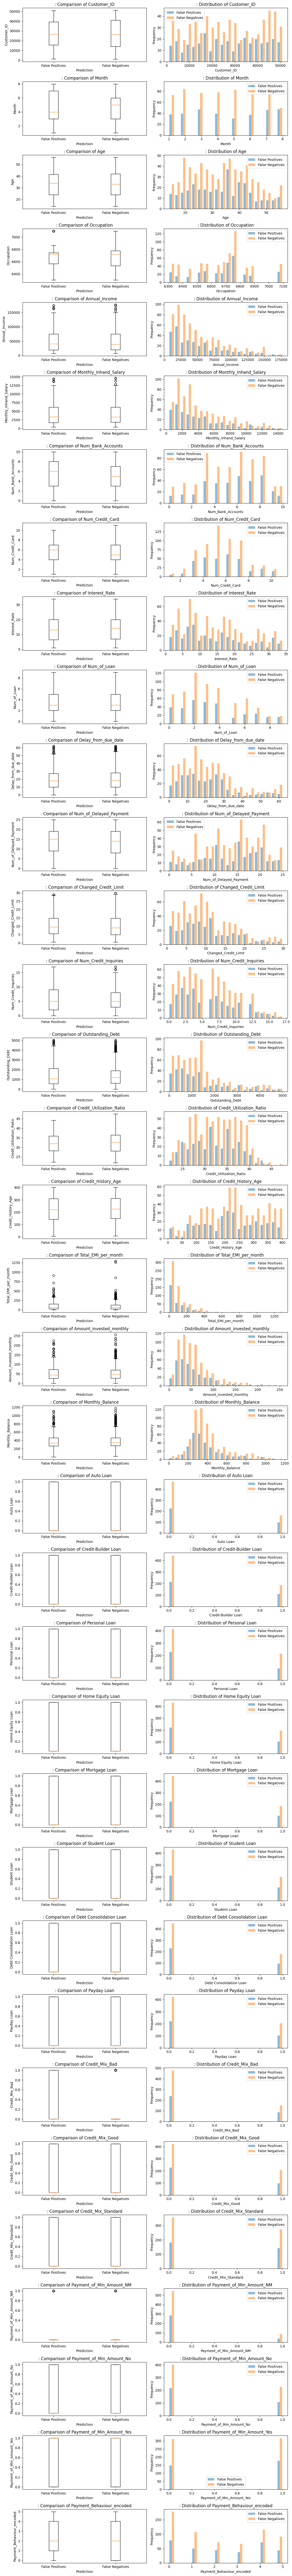

In [5]:
# Applying analysis on features to determine the cause of non-changing accuracy
# Creating an instance of class "Methods"
methods3 = Methods(Random_Forest_Best)

# Call the feature analysis function on testing data
methods3.feature_analysis(X, y_test, pred_test, "")

Figuring out the distributions for the columns with noticeable amount of outliers:
- Use Logarithmic Transformation on "Amount_invested_monthly," "Monthly_Balance," "Total_EMI_per_month," and "Num_Credit_Inquiries"
- Due to presence of extreme outliers in "Annual_Income," "Delay_from_due_date," and "Outstanding_Debt"

In [10]:
# logarithmic transformation to specified features
log_transform_features = ["Amount_invested_monthly", "Monthly_Balance", "Total_EMI_per_month", "Num_Credit_Inquiries"]

for feature in log_transform_features:
    X[feature] = np.log1p(X[feature])  # Using np.log1p to handle zero values



Based on previous operartions (Project 1):
- Annual_Income adopts non-normal distribution (impute with median)
- Delay_from_due_date adopts a non-normal distribution (impute with median)
- Outstanding_Debt adopts a non-normal distribution (impute with median)

In [11]:
# Specify the features 
impute_features = ["Outstanding_Debt", "Annual_Income", "Delay_from_due_date"]

# SimpleImputer instance for mean imputation
imputer = SimpleImputer(strategy="median")

# Fit the imputer on the training data and transform the specified features
X[impute_features] = imputer.fit_transform(X[impute_features])



In [12]:
# Resplit the data
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size = 0.5, random_state = 42)

In [13]:
model = RandomForestClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled, y_train_resampled = methods_instance.SMOTE_Balancing(X_train, y_train)

Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [14]:
Random_Forest_Best = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300)

Random_Forest_Best.fit(X_train_resampled, y_train_resampled)
        
# Validation
pred_val = Random_Forest_Best.predict(X_val)
# Evaluating validation
# Accuracy
accuracy_val = accuracy_score(y_val, pred_val)
# Classification report
report_val = classification_report(y_val, pred_val)

# Testing
pred_test = Random_Forest_Best.predict(X_test)
# Evaluating testing
# Accuracy
accuracy_test = accuracy_score(y_test, pred_test)
# Classification report
report_test = classification_report(y_test, pred_test) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test}")


Random Forest Classifier's validation accuracy is 0.8203
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.73      0.84      0.78      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.81     10000
weighted avg       0.83      0.82      0.82     10000

Random Forest Classifier's testing accuracy is 0.8281
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2980
           1       0.88      0.80      0.84      5282
           2       0.74      0.85      0.79      1738

    accuracy       

Slight change in f1-score, recall, and precision.

# Scale the Data

In [23]:
# Split the data
# Import dataset, split data, create an instance of the methods class and pass a throwaway model.
X2 = df.drop(columns = ['Credit_Score_encoded'])
y2 = df['Credit_Score_encoded']

X_train3, X_temp3, y_train3, y_temp3 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)
X_val3, X_test3, y_val3, y_test3 = train_test_split(X_temp3, y_temp3, test_size = 0.5, random_state = 42)

model = RandomForestClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled3, y_train_resampled3 = methods_instance.SMOTE_Balancing(X_train3, y_train3)

Class Distribution Before SMOTE:
{0: 23124, 1: 42575, 2: 14301}

Class Distribution After SMOTE:
{0: 42575, 1: 42575, 2: 42575}


In [24]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on your training data
X_train_scaled = scaler.fit_transform(X_train_resampled3)

# Apply the same scaler to your validation and test sets
X_val_scaled = scaler.transform(X_val3)
X_test_scaled = scaler.transform(X_test3)

In [25]:
Random_Forest_Best = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300)

Random_Forest_Best.fit(X_train_resampled3, y_train_resampled3)
        
# Validation
pred_val3 = Random_Forest_Best.predict(X_val3)
# Evaluating validation
# Accuracy
accuracy_val3 = accuracy_score(y_val3, pred_val3)
# Classification report
report_val3 = classification_report(y_val3, pred_val3)

# Testing
pred_test3 = Random_Forest_Best.predict(X_test3)
# Evaluating testing
# Accuracy
accuracy_test3 = accuracy_score(y_test3, pred_test3)
# Classification report
report_test3 = classification_report(y_test3, pred_test3) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val3}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val3}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test3}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test3}")


Random Forest Classifier's validation accuracy is 0.8225
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83      2894
           1       0.87      0.79      0.83      5317
           2       0.74      0.84      0.79      1789

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.82     10000
weighted avg       0.83      0.82      0.82     10000

Random Forest Classifier's testing accuracy is 0.827
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2980
           1       0.88      0.80      0.84      5282
           2       0.74      0.85      0.79      1738

    accuracy        

# Experimenting on Outlier-Free Data Using the Best Model

In [3]:
dff = pd.read_csv("no_outliers_encoded.csv")

In [4]:
X2 = dff.drop(columns = ['Credit_Score_encoded'])
y2 = dff['Credit_Score_encoded']
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size = 0.2, random_state = 42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size = 0.5, random_state = 42)

In [5]:
Random_Forest_Best2 = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300, random_state = 42)

Random_Forest_Best2.fit(X_train2, y_train2)
        
# Validation
pred_val2 = Random_Forest_Best2.predict(X_val2)
# Evaluating validation
# Accuracy
accuracy_val2 = accuracy_score(y_val2, pred_val2)
# Classification report
report_val2 = classification_report(y_val2, pred_val2)

# Testing
pred_test2 = Random_Forest_Best2.predict(X_test2)
# Evaluating testing
# Accuracy
accuracy_test2 = accuracy_score(y_test2, pred_test2)
# Classification report
report_test2 = classification_report(y_test2, pred_test2) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val2}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val2}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test2}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test2}")

Random Forest Classifier's validation accuracy is 0.8387368421052631
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2806
           1       0.86      0.83      0.85      5003
           2       0.82      0.81      0.82      1691

    accuracy                           0.84      9500
   macro avg       0.83      0.84      0.83      9500
weighted avg       0.84      0.84      0.84      9500

Random Forest Classifier's testing accuracy is 0.84
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2727
           1       0.87      0.83      0.85      5135
           2       0.82      0.82      0.82      1638

    accur

In [6]:
# RF with default parameters
rff = RandomForestClassifier(random_state = 42)
rff.fit(X_train2, y_train2)
        
# Validation
pred_val3 = rff.predict(X_val2)
# Evaluating validation
# Accuracy
accuracy_val3 = accuracy_score(y_val2, pred_val3)
# Classification report
report_val3 = classification_report(y_val2, pred_val3)

# Testing
pred_test3 = rff.predict(X_test2)
# Evaluating testing
# Accuracy
accuracy_test3 = accuracy_score(y_test2, pred_test3)
# Classification report
report_test3 = classification_report(y_test2, pred_test3) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val3}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val3}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test3}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test3}")

Random Forest Classifier's validation accuracy is 0.8382105263157895
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      2806
           1       0.86      0.84      0.85      5003
           2       0.82      0.81      0.82      1691

    accuracy                           0.84      9500
   macro avg       0.83      0.84      0.83      9500
weighted avg       0.84      0.84      0.84      9500

Random Forest Classifier's testing accuracy is 0.8385263157894737
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.83      2727
           1       0.86      0.83      0.85      5135
           2       0.82      0.81      0.81      1

In [7]:
# Using SMOTE
model = RandomForestClassifier()
methods_instance = Methods(model) # Pass any throwaway model just to make the instance work. 
#Make sure to create a different instance with the model that you actually want to perform operations on from the Methods class

# Perform SMOTE balancing
X_train_resampled4, y_train_resampled4 = methods_instance.SMOTE_Balancing(X_train2, y_train2)

Class Distribution Before SMOTE:
{0: 21707, 1: 40763, 2: 13530}

Class Distribution After SMOTE:
{0: 40763, 1: 40763, 2: 40763}


In [8]:
Random_Forest_Best2 = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300, random_state = 42)

Random_Forest_Best2.fit(X_train_resampled4, y_train_resampled4)
        
# Validation
pred_val2 = Random_Forest_Best2.predict(X_val2)
# Evaluating validation
# Accuracy
accuracy_val2 = accuracy_score(y_val2, pred_val2)
# Classification report
report_val2 = classification_report(y_val2, pred_val2)

# Testing
pred_test2 = Random_Forest_Best2.predict(X_test2)
# Evaluating testing
# Accuracy
accuracy_test2 = accuracy_score(y_test2, pred_test2)
# Classification report
report_test2 = classification_report(y_test2, pred_test2) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val2}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val2}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test2}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test2}")

Random Forest Classifier's validation accuracy is 0.8267368421052631
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2806
           1       0.88      0.79      0.83      5003
           2       0.74      0.85      0.79      1691

    accuracy                           0.83      9500
   macro avg       0.81      0.84      0.82      9500
weighted avg       0.83      0.83      0.83      9500

Random Forest Classifier's testing accuracy is 0.8311578947368421
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83      2727
           1       0.89      0.80      0.84      5135
           2       0.76      0.85      0.80      1

In [9]:
# RF with default parameters
rff = RandomForestClassifier(random_state = 42)
rff.fit(X_train_resampled4, y_train_resampled4)
        
# Validation
pred_val3 = rff.predict(X_val2)
# Evaluating validation
# Accuracy
accuracy_val3 = accuracy_score(y_val2, pred_val3)
# Classification report
report_val3 = classification_report(y_val2, pred_val3)

# Testing
pred_test3 = rff.predict(X_test2)
# Evaluating testing
# Accuracy
accuracy_test3 = accuracy_score(y_test2, pred_test3)
# Classification report
report_test3 = classification_report(y_test2, pred_test3) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val3}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val3}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test3}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test3}")

Random Forest Classifier's validation accuracy is 0.8232631578947368
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2806
           1       0.87      0.79      0.83      5003
           2       0.73      0.84      0.78      1691

    accuracy                           0.82      9500
   macro avg       0.80      0.83      0.82      9500
weighted avg       0.83      0.82      0.82      9500

Random Forest Classifier's testing accuracy is 0.8257894736842105
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.79      0.87      0.83      2727
           1       0.88      0.80      0.84      5135
           2       0.75      0.84      0.80      1

# Stratify instead of SMOTE

In [10]:
# Using Stratify
X_stratify = dff.drop(columns=['Credit_Score_encoded'])
y_stratify = dff['Credit_Score_encoded']

# Split the data into train, validation, and test sets with stratification
X_train_stra, X_temp_stra, y_train_stra, y_temp_stra = train_test_split(X_stratify, y_stratify, test_size = 0.2, random_state = 42, stratify = y_stratify)
X_val_stra, X_test_stra, y_val_stra, y_test_stra = train_test_split(X_temp_stra, y_temp_stra, test_size = 0.5, random_state = 42, stratify = y_temp_stra)


In [11]:
# Using RF with Default parameters (Stratify)
instance = RandomForest(X_train_stra, y_train_stra, X_val_stra, y_val_stra, X_test_stra, y_test_stra)
rf_stratify = instance.Random_Forest_Classic()

Random Forest Classifier's validation accuracy is 0.84
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2724
           1       0.86      0.83      0.85      5090
           2       0.81      0.81      0.81      1686

    accuracy                           0.84      9500
   macro avg       0.83      0.84      0.83      9500
weighted avg       0.84      0.84      0.84      9500

Random Forest Classifier's testing accuracy is 0.8395789473684211
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      2724
           1       0.86      0.84      0.85      5090
           2       0.80      0.81      0.81      1686

    accur

In [12]:
# Using RF with best parameters (GridSearchCV)

Random_Forest_stra = RandomForestClassifier(max_depth = None,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators = 300, random_state = 42)

Random_Forest_stra.fit(X_train_stra, y_train_stra)
        
# Validation
pred_val_stra = Random_Forest_stra.predict(X_val_stra)
# Evaluating validation
# Accuracy
accuracy_val_stra = accuracy_score(y_val_stra, pred_val_stra)
# Classification report
report_val_stra = classification_report(y_val_stra, pred_val_stra)

# Testing
pred_test_stra = Random_Forest_stra.predict(X_test_stra)
# Evaluating testing
# Accuracy
accuracy_test_stra = accuracy_score(y_test_stra, pred_test_stra)
# Classification report
report_test_stra = classification_report(y_test_stra, pred_test_stra) 

# Printing the results
print(f"Random Forest Classifier's validation accuracy is {accuracy_val_stra}")
print("-"*70)
print(f"Random Forest Classifier's validation classification report is: \n {report_val_stra}")
print("="*100)
print(f"Random Forest Classifier's testing accuracy is {accuracy_test_stra}")
print("-"*70)
print(f"Random Forest Classifier's testing classification report is: \n {report_test_stra}")

Random Forest Classifier's validation accuracy is 0.840421052631579
----------------------------------------------------------------------
Random Forest Classifier's validation classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      2724
           1       0.86      0.83      0.85      5090
           2       0.81      0.81      0.81      1686

    accuracy                           0.84      9500
   macro avg       0.83      0.84      0.83      9500
weighted avg       0.84      0.84      0.84      9500

Random Forest Classifier's testing accuracy is 0.8389473684210527
----------------------------------------------------------------------
Random Forest Classifier's testing classification report is: 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      2724
           1       0.86      0.84      0.85      5090
           2       0.80      0.80      0.80      16

In terms of accuracy it is not changed in comaprison to SMOTE. However, models built with stratify seem to be more precise, with higher recall anf f1-score for each inidiviual class